In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
df = pd.read_csv("Electronic_sales_Sep2023-Sep2024.csv")
df

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,27,Female,No,Smartphone,SMP234,4,Completed,Bank Transfer,6838.08,1139.68,6,2024-06-15,Expedited,NaN,0.00
19996,19996,27,Female,Yes,Laptop,LTP123,4,Cancelled,Credit Card,2697.28,674.32,4,2024-07-18,Standard,NaN,0.00
19997,19996,27,Female,No,Headphones,HDP456,4,Completed,Bank Transfer,1805.90,361.18,5,2024-08-26,Standard,"Impulse Item, Extended Warranty, Accessory",198.98
19998,19997,27,Male,No,Headphones,HDP456,1,Cancelled,Bank Transfer,2528.26,361.18,7,2024-01-06,Expedited,"Extended Warranty, Accessory",101.34


In [97]:
df.isnull().sum()

Customer ID             0
Age                     0
Gender                  1
Loyalty Member          0
Product Type            0
SKU                     0
Rating                  0
Order Status            0
Payment Method          0
Total Price             0
Unit Price              0
Quantity                0
Purchase Date           0
Shipping Type           0
Add-ons Purchased    4868
Add-on Total            0
dtype: int64

In [98]:
df.drop(columns=['Add-ons Purchased'], inplace=True)
df.dropna(axis=0, how='any', inplace=True)
df.isnull().sum()

Customer ID       0
Age               0
Gender            0
Loyalty Member    0
Product Type      0
SKU               0
Rating            0
Order Status      0
Payment Method    0
Total Price       0
Unit Price        0
Quantity          0
Purchase Date     0
Shipping Type     0
Add-on Total      0
dtype: int64

In [99]:
df.sort_values(by=['Customer ID', 'Purchase Date'], inplace=True)

cancel_ratio = df[df['Order Status'] == 'Cancelled'].groupby('Customer ID').size() / df.groupby('Customer ID').size()
df['Cancel Ratio'] = df['Customer ID'].map(cancel_ratio).fillna(0)

df['Add-on Proportion'] = df['Add-on Total'] / df['Total Price']
df['Add-on Proportion'].fillna(0, inplace=True)  # Обработка деления на ноль

bins = [0, 25, 40, 60, 100]
labels = ['Youth (<25)', 'Adults (25-40)', 'Middle Age (40-60)', 'Senior (60+)']
df['Age Segment'] = pd.cut(df['Age'], bins=bins, labels=labels)

df

/tmp/ipykernel_1424/622463557.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Add-on Proportion'].fillna(0, inplace=True)  # Обработка деления на ноль


,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-on Total,Cancel Ratio,Add-on Proportion,Age Segment
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,40.21,0.5,0.007260,Middle Age (40-60)
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,26.09,0.5,0.035205,Middle Age (40-60)
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,0.00,0.0,0.000000,Middle Age (40-60)
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,60.16,0.0,0.019009,Middle Age (40-60)
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,35.56,0.0,0.856867,Senior (60+)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,19996,27,Female,No,Smartphone,SMP234,5,Completed,Credit Card,3419.04,1139.68,3,2024-04-20,Same Day,0.00,0.5,0.000000,Adults (25-40)
19995,19996,27,Female,No,Smartphone,SMP234,4,Completed,Bank Transfer,6838.08,1139.68,6,2024-06-15,Expedited,0.00,0.5,0.000000,Adults (25-40)
19996,19996,27,Female,Yes,Laptop,LTP123,4,Cancelled,Credit Card,2697.28,674.32,4,2024-07-18,Standard,0.00,0.5,0.000000,Adults (25-40)
19997,19996,27,Female,No,Headphones,HDP456,4,Completed,Bank Transfer,1805.90,361.18,5,2024-08-26,Standard,198.98,0.5,0.110183,Adults (25-40)


In [100]:
from datetime import timedelta

df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], errors='coerce')

# Разметка по статусу "Loyalty Member"
df['Churn By Loyalty'] = ((df['Loyalty Member'] == 'No') & (df.groupby('Customer ID')['Loyalty Member'].shift(1) == 'Yes')).astype(int)

# Разметка по отсутствию покупок (проверяем последний заказ каждого клиента)
latest_purchase_date = df.groupby('Customer ID')['Purchase Date'].max()
cutoff_date = latest_purchase_date - timedelta(days=180)  # 6 месяцев
churn_by_inactivity = latest_purchase_date < cutoff_date
df['Churn By Inactivity'] = df['Customer ID'].map(churn_by_inactivity).astype(int)

# Итоговая разметка: если хотя бы один критерий выполняется
df['Churn'] = (df['Churn By Loyalty'] | df['Churn By Inactivity'])

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19999 entries, 0 to 19998
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Customer ID          19999 non-null  int64         
 1   Age                  19999 non-null  int64         
 2   Gender               19999 non-null  object        
 3   Loyalty Member       19999 non-null  object        
 4   Product Type         19999 non-null  object        
 5   SKU                  19999 non-null  object        
 6   Rating               19999 non-null  int64         
 7   Order Status         19999 non-null  object        
 8   Payment Method       19999 non-null  object        
 9   Total Price          19999 non-null  float64       
 10  Unit Price           19999 non-null  float64       
 11  Quantity             19999 non-null  int64         
 12  Purchase Date        19999 non-null  datetime64[ns]
 13  Shipping Type        19999 non-null 

In [102]:
df.drop(columns=['SKU', 'Customer ID', 'Purchase Date', 
                 'Churn By Loyalty', 'Churn By Inactivity', 'Order Status'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19999 entries, 0 to 19998
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                19999 non-null  int64   
 1   Gender             19999 non-null  object  
 2   Loyalty Member     19999 non-null  object  
 3   Product Type       19999 non-null  object  
 4   Rating             19999 non-null  int64   
 5   Payment Method     19999 non-null  object  
 6   Total Price        19999 non-null  float64 
 7   Unit Price         19999 non-null  float64 
 8   Quantity           19999 non-null  int64   
 9   Shipping Type      19999 non-null  object  
 10  Add-on Total       19999 non-null  float64 
 11  Cancel Ratio       19999 non-null  float64 
 12  Add-on Proportion  19999 non-null  float64 
 13  Age Segment        19999 non-null  category
 14  Churn              19999 non-null  int64   
dtypes: category(1), float64(5), int64(4), object(5)
memory usa

In [103]:
categorical_columns = ['Gender', 'Loyalty Member', 'Product Type', 'Shipping Type', 'Payment Method', 'Age Segment']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19999 entries, 0 to 19998
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             19999 non-null  int64  
 1   Rating                          19999 non-null  int64  
 2   Total Price                     19999 non-null  float64
 3   Unit Price                      19999 non-null  float64
 4   Quantity                        19999 non-null  int64  
 5   Add-on Total                    19999 non-null  float64
 6   Cancel Ratio                    19999 non-null  float64
 7   Add-on Proportion               19999 non-null  float64
 8   Churn                           19999 non-null  int64  
 9   Gender_Male                     19999 non-null  bool   
 10  Loyalty Member_Yes              19999 non-null  bool   
 11  Product Type_Laptop             19999 non-null  bool   
 12  Product Type_Smartphone         19999

In [104]:
bool_cols = df.select_dtypes(include=['bool']).columns.tolist()
df[bool_cols] = df[bool_cols].astype(int)

In [105]:
from sklearn.preprocessing import StandardScaler

columns_to_normalize = df.select_dtypes(include=['float64']).columns.tolist()
scaler = StandardScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
df

,Age,Rating,Total Price,Unit Price,Quantity,Add-on Total,Cancel Ratio,Add-on Proportion,Churn,Gender_Male,...,Shipping Type_Same Day,Shipping Type_Standard,Payment Method_Cash,Payment Method_Credit Card,Payment Method_Debit Card,Payment Method_PayPal,Payment Method_Paypal,Age Segment_Adults (25-40),Age Segment_Middle Age (40-60),Age Segment_Senior (60+)
0,53,2,0.926581,0.680695,7,-0.379593,0.466763,-0.255937,0,1,...,0,1,0,1,0,0,0,0,1,0
1,53,3,-0.958447,-1.061881,3,-0.622804,0.466763,-0.171241,0,1,...,0,0,0,0,0,0,1,0,1,0
2,41,3,-0.520417,-0.367201,4,-1.072191,-0.893400,-0.277942,0,1,...,0,0,0,1,0,0,0,0,1,0
3,41,2,-0.006090,0.680695,4,-0.035964,-0.893400,-0.220327,0,1,...,0,0,1,0,0,0,0,0,1,0
4,75,5,-1.233344,-1.786502,2,-0.459687,-0.893400,2.319099,0,1,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,27,5,0.093827,1.796672,3,-1.072191,0.466763,-0.277942,0,0,...,1,0,0,1,0,0,0,1,0,0
19995,27,4,1.437305,1.796672,6,-1.072191,0.466763,-0.277942,0,0,...,0,0,0,0,0,0,0,1,0,0
19996,27,4,-0.189782,0.306440,4,-1.072191,0.466763,-0.277942,0,0,...,0,1,0,1,0,0,0,1,0,0
19997,27,4,-0.540041,-0.696336,5,2.355144,0.466763,0.056008,1,0,...,0,1,0,0,0,0,0,1,0,0


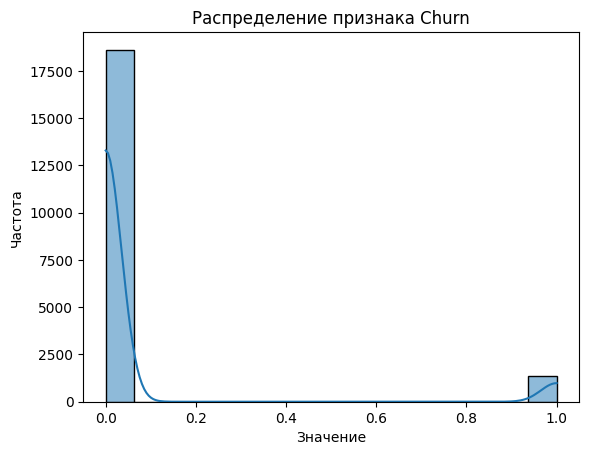

In [106]:
def distribution_plot(df, feature):
    sns.histplot(df[feature], kde=True)
    plt.title(f'Распределение признака {feature}')
    plt.xlabel('Значение')
    plt.ylabel('Частота')

    plt.show()

distribution_plot(df, 'Churn')

In [107]:
y = df['Churn']
df.drop(columns=['Churn'], inplace=True)

AUC-ROC: 0.6163


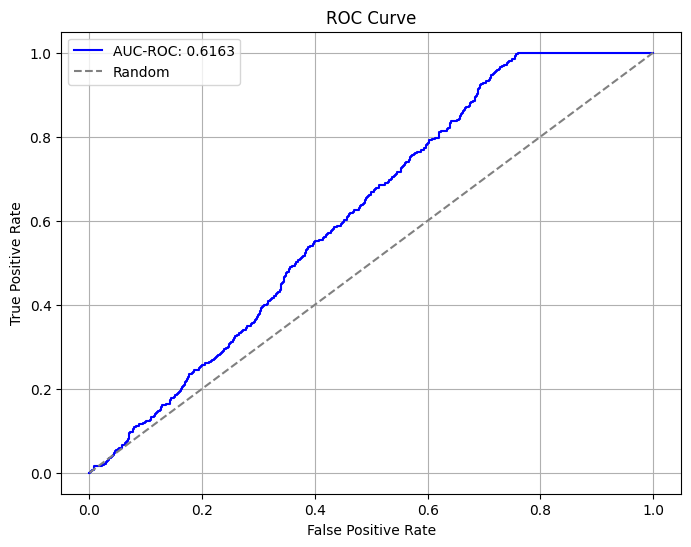

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Разделяем данные на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=42, stratify=y)

# Создаем и обучаем модель логистической регрессии
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Предсказываем вероятности принадлежности к классу "1" (Churn) на тестовой выборке
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Вычисляем AUC-ROC
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC: {auc:.4f}")

# Строим ROC-кривую
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC-ROC: {auc:.4f}", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


Fitting 3 folds for each of 324 candidates, totalling 972 fits


Лучшие параметры: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
AUC-ROC (Random Forest): 0.7062


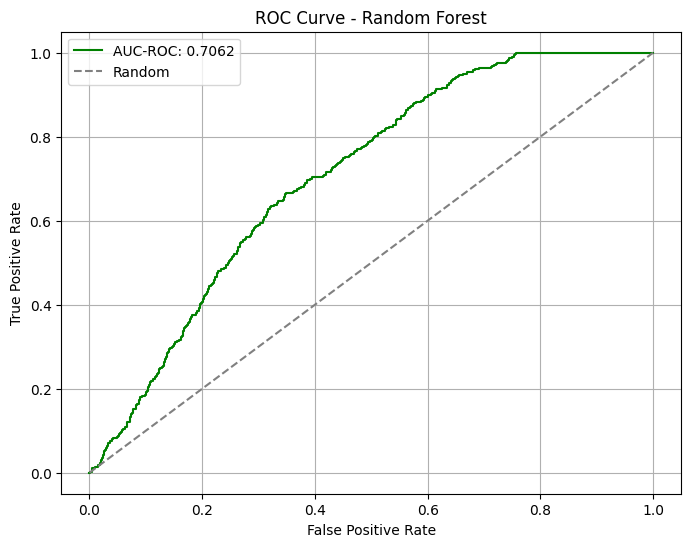

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

# Разделяем данные на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=42, stratify=y)

# Определяем сетку гиперпараметров
param_grid = {
    'n_estimators': [50, 100, 200],             # Количество деревьев
    'max_depth': [None, 10, 20, 30],            # Максимальная глубина дерева
    'min_samples_split': [2, 5, 10],            # Минимальное количество выборок для разделения узла
    'min_samples_leaf': [1, 2, 4],              # Минимальное количество выборок в листе
    'max_features': ['sqrt', 'log2', None]      # Количество признаков для выбора на каждом узле
}

# Создаем модель Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Настраиваем GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,             # 3-кратная перекрестная проверка
    verbose=1,         # Вывод прогресса
    n_jobs=-1          # Использовать все доступные ядра процессора
)

# Запускаем подбор гиперпараметров
grid_search.fit(X_train, y_train)

# Лучшая модель и параметры
best_rf_model = grid_search.best_estimator_
print("Лучшие параметры:", grid_search.best_params_)

# Предсказываем вероятности на тестовой выборке
y_pred_proba_rf = best_rf_model.predict_proba(X_test)[:, 1]

# Вычисляем AUC-ROC
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f"AUC-ROC (Random Forest): {auc_rf:.4f}")

# Строим ROC-кривую
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC-ROC: {auc_rf:.4f}", color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.grid()
plt.show()


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Лучшие параметры: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8}
Accuracy: 0.9307
ROC AUC: 0.7264


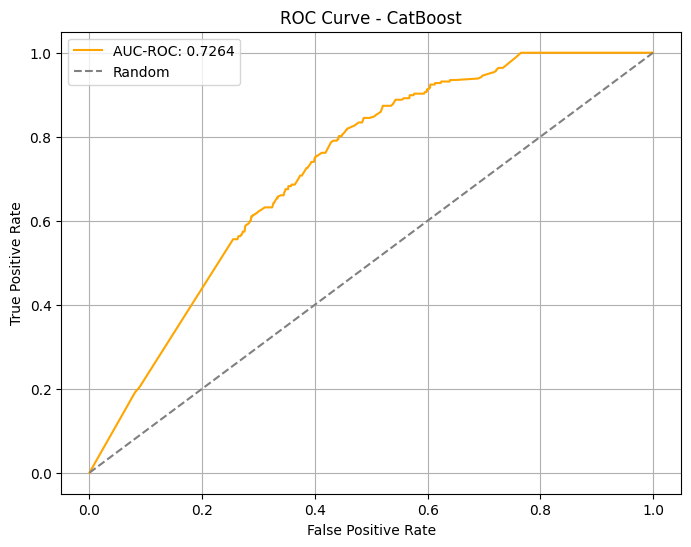

In [112]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

# Инициализация модели
model = GradientBoostingClassifier(random_state=42)

# Параметры для подбора
param_grid = {
    'n_estimators': [100, 200, 300],  # Количество деревьев
    'learning_rate': [0.01, 0.1, 0.2], # Скорость обучения
    'max_depth': [3, 4, 5],            # Максимальная глубина деревьев
    'subsample': [0.8, 1.0],           # Доля выборки для каждого дерева
    'min_samples_split': [2, 5]        # Минимальное количество выборок для разделения узла
}

# Использование GridSearchCV для подбора параметров
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1, scoring='roc_auc')

# Обучение модели с подбором параметров
grid_search.fit(X_train, y_train)

# Лучшая модель и параметры
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Лучшие параметры: {best_params}")

# Предсказания
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Оценка качества
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
# Строим ROC-кривую
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC-ROC: {roc_auc:.4f}", color='orange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - CatBoost")
plt.legend()
plt.grid()
plt.show()